<a href="https://colab.research.google.com/github/jerrycrosby12/my-sql-scripts/blob/main/Project_Banking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pandas as pd

In [ ]:
#Open data file and store into a Pandas Data Frame
dataset = pd.read_csv('BankSet.csv')

#Output top 10 data rows
dataset.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,purchase
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,1,147,2,failure,no


In [ ]:
# Dummy code the categorical variables
dataset = pd.concat([dataset, pd.get_dummies(dataset['job'], prefix='job', drop_first=True)], axis=1)
dataset.drop(['job'], inplace=True, axis=1)

dataset = pd.concat([dataset, pd.get_dummies(dataset['marital'], prefix='marital', drop_first=True)], axis=1)
dataset.drop(['marital'], inplace=True, axis=1)

dataset = pd.concat([dataset, pd.get_dummies(dataset['education'], prefix='education', drop_first=True)], axis=1)
dataset.drop(['education'], inplace=True, axis=1)

dataset = pd.concat([dataset, pd.get_dummies(dataset['housing'], prefix='housing', drop_first=True)], axis=1)
dataset.drop(['housing'], inplace=True, axis=1)

dataset = pd.concat([dataset, pd.get_dummies(dataset['contact'], prefix='contact', drop_first=True)], axis=1)
dataset.drop(['contact'], inplace=True, axis=1)

dataset = pd.concat([dataset, pd.get_dummies(dataset['purchase'], prefix='purchase', drop_first=True)], axis=1)
dataset.drop(['purchase'], inplace=True, axis=1)

dataset = pd.concat([dataset, pd.get_dummies(dataset['poutcome'], prefix='poutcome', drop_first=True)], axis=1)
dataset.drop(['poutcome'], inplace=True, axis=1)

In [ ]:
dataset.head(20)

,age,default,balance,loan,day,month,campaign,pdays,previous,job_blue-collar,...,education_secondary,education_tertiary,education_unknown,housing_yes,contact_telephone,contact_unknown,purchase_yes,poutcome_other,poutcome_success,poutcome_unknown
0,30,no,1787,no,19,oct,1,-1,0,False,...,False,False,False,False,False,False,False,False,False,True
1,33,no,4789,yes,11,may,1,339,4,False,...,True,False,False,True,False,False,False,False,False,False
2,35,no,1350,no,16,apr,1,330,1,False,...,False,True,False,True,False,False,False,False,False,False
3,30,no,1476,yes,3,jun,4,-1,0,False,...,False,True,False,True,False,True,False,False,False,True
4,59,no,0,no,5,may,1,-1,0,True,...,True,False,False,True,False,True,False,False,False,True
5,35,no,747,no,23,feb,2,176,3,False,...,False,True,False,False,False,False,False,False,False,False
6,36,no,307,no,14,may,1,330,2,False,...,False,True,False,True,False,False,False,True,False,False
7,39,no,147,no,6,may,2,-1,0,False,...,True,False,False,True,False,False,False,False,False,True
8,41,no,221,no,14,may,2,-1,0,False,...,False,True,False,True,False,True,False,False,False,True
9,43,no,-88,yes,17,apr,1,147,2,False,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
# Create a list with the names of the predictors
training_features = ['age','marital_married','marital_single','education_secondary',
                     'education_tertiary','education_unknown',
                     'housing_yes','contact_telephone','contact_unknown',
                     'poutcome_success','poutcome_other','poutcome_unknown']

# Create a new data frame containing only the predictors
X=dataset[training_features]
X.head(10)

,age,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,housing_yes,contact_telephone,contact_unknown,poutcome_success,poutcome_other,poutcome_unknown
0,30,True,False,False,False,False,False,False,False,False,False,True
1,33,True,False,True,False,False,True,False,False,False,False,False
2,35,False,True,False,True,False,True,False,False,False,False,False
3,30,True,False,False,True,False,True,False,True,False,False,True
4,59,True,False,True,False,False,True,False,True,False,False,True
5,35,False,True,False,True,False,False,False,False,False,False,False
6,36,True,False,False,True,False,True,False,False,False,True,False
7,39,True,False,True,False,False,True,False,False,False,False,True
8,41,True,False,False,True,False,True,False,True,False,False,True
9,43,True,False,False,False,False,True,False,False,False,False,False


In [ ]:
#Identify the target variable
target_feature = ['purchase_yes']

# Create a new data frame containing only the target variable
y=dataset[target_feature]
y.head(10)

,purchase_yes
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [ ]:
#Import Split function
#from sklearn.model_selection import train_test_split

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [ ]:
#Compare means of the training and testing partition
print(y_train.mean())
print(y_test.mean())

purchase_yes    0.116814
dtype: float64
purchase_yes    0.110522
dtype: float64


In [ ]:
#Import Decision Tree Classifier
#from sklearn.tree import DecisionTreeClassifier

#Configure classifier to a max depth of 3
class_tree = DecisionTreeClassifier(max_depth=3)

#Fit the classifier t the data
class_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

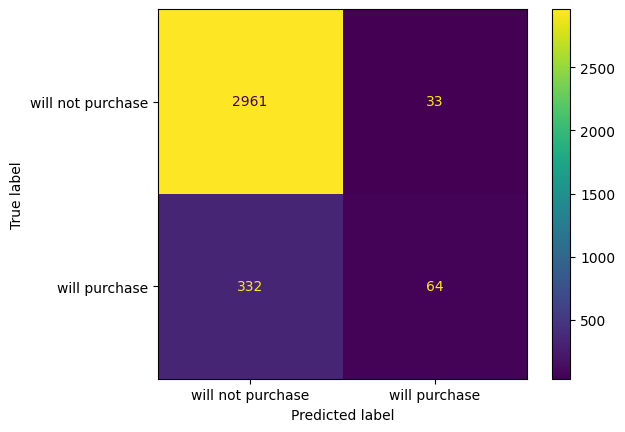

In [ ]:
#Import the function to create a confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions based on the model
y_train_pred = class_tree.predict(X_train)

# Report the 'actual' vs 'prediction' in a confusion matrix
cm = confusion_matrix(y_train,y_train_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['will not purchase','will purchase'])
cmd.plot()

In [ ]:
#Import function to calculate accuracy score
#from sklearn.metrics import accuracy_score

#Calcualte accuracy
accuracy = accuracy_score(y_true=y_train, y_pred=y_train_pred)

#Round accuracy to 3 decimal places and report
round(accuracy,3)

0.892

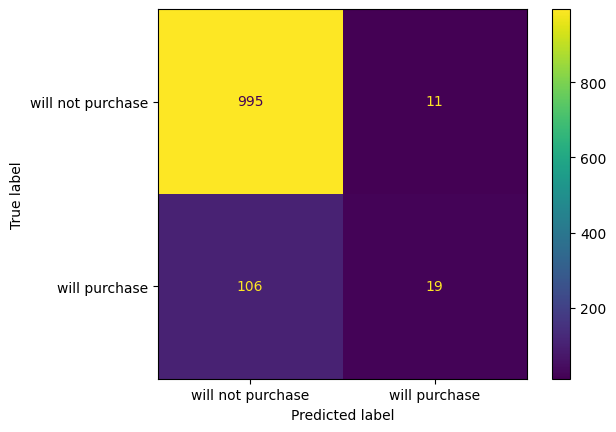

In [ ]:
# Generate test predictions based on the model
y_test_pred = class_tree.predict(X_test)

# Report the 'actual' vs 'prediction' in a confusion matrix
cm_pred = confusion_matrix(y_test,y_test_pred)
cmd_pred = ConfusionMatrixDisplay(cm_pred, display_labels=['will not purchase','will purchase'])
cmd_pred.plot()


In [ ]:
#Calcualte accuracy
accuracy = accuracy_score(y_true=y_test, y_pred=y_test_pred)

#Round accuracy to 3 decimal places and report
round(accuracy,3)

0.897

In [ ]:
#Report most influential features
pd.Series(data=class_tree.feature_importances_, \
          index=X_train.columns).sort_values(ascending=False).round(5)

,0
poutcome_success,0.69819
age,0.21043
contact_unknown,0.07443
housing_yes,0.01695
education_secondary,0.00000
marital_single,0.00000
marital_married,0.00000
education_tertiary,0.00000
contact_telephone,0.00000
education_unknown,0.00000


[Text(0.5769230769230769, 0.875, 'poutcome_success <= 0.5\ngini = 0.206\nsamples = 3164\nvalue = [2795, 369]\nclass = low'),
 Text(0.3076923076923077, 0.625, 'age <= 60.5\ngini = 0.181\nsamples = 3072\nvalue = [2762, 310]\nclass = low'),
 Text(0.4423076923076923, 0.75, 'True  '),
 Text(0.15384615384615385, 0.375, 'contact_unknown <= 0.5\ngini = 0.17\nsamples = 2984\nvalue = [2705, 279]\nclass = low'),
 Text(0.07692307692307693, 0.125, 'gini = 0.201\nsamples = 2065\nvalue = [1831, 234]\nclass = low'),
 Text(0.23076923076923078, 0.125, 'gini = 0.093\nsamples = 919\nvalue = [874, 45]\nclass = low'),
 Text(0.46153846153846156, 0.375, 'age <= 70.5\ngini = 0.456\nsamples = 88\nvalue = [57, 31]\nclass = low'),
 Text(0.38461538461538464, 0.125, 'gini = 0.38\nsamples = 51\nvalue = [38, 13]\nclass = low'),
 Text(0.5384615384615384, 0.125, 'gini = 0.5\nsamples = 37\nvalue = [19, 18]\nclass = low'),
 Text(0.8461538461538461, 0.625, 'age <= 79.5\ngini = 0.46\nsamples = 92\nvalue = [33, 59]\nclass =

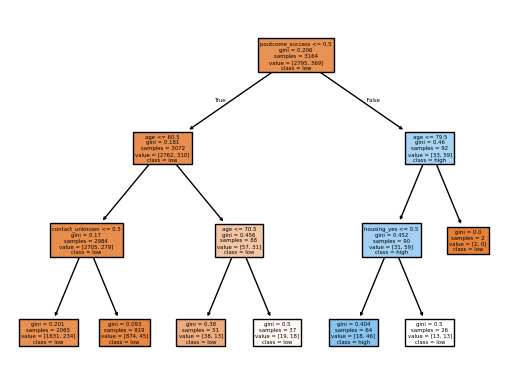

In [ ]:
# Here is a decision class tree for further visualization
import sklearn.tree as tree

tree.plot_tree(class_tree,
               feature_names=training_features,
               class_names=['low','high'],
              filled=True)